__Градиентный бустинг__

Cлучайный лес - это ансамбль деревьев небольшой глубины, строящихся независимо друг от друга. В независимости построения деревьев кроется и **плюс и минус алгоритма**: с одной стороны, построение деревьев можно **распараллеливать** и, например, организовывать на разных ядрах процессора, с другой стороны, следствием их независимости является тот факт, что для решения сложных задач требуется очень **большое количество деревьев**. В этих случаях случаях (при большой выборке или большом количестве признаков) обучение случайного леса может требовать очень много ресурсов, а если для ограничения их потребления слишком ограничивать глубину деревьев, они могут не уловить все закономерности в данных и иметь большой сдвиг (и, следовательно, ошибку).

**Бустинг** является своеобразным решением этой проблемы: он заключается в **последовательном** построении ансамбля, когда деревья строятся одно за другим, и при этом каждое следующее дерево строится таким образом, чтобы исправлять ошибки уже построенного на данный момент ансамбля. При таком подходе базовые алгоритмы могут быть достаточно простыми, то есть можно использовать неглубокие деревья.

**Алгоритм построения градиентного бустинга**
1. Инициализация начального алгоритма $b_{0}(x)$

2. Цикл по n = 1,2,3,...:

    * Подсчитывание остатков $s = \left ( \left.-\frac{\partial L}{\partial z} \right|_{z = a_{n-1}(x_{1})},...,\left.-\frac{\partial L}{\partial z} \right|_{z = a_{n-1}(x_{l})}\right );$

    * Обучение нового алгоритма $b_{n}(x) = \underset{s}{\text{argmin}}\frac{1}{l}\sum_{i=1}^{l}(b(x_{i})-s_{i})^{2};$
    
    * Добавление алгоритма в композицию $a_{n}(x) = a_{n-1}(x) + \eta b_{n}(x).$
    
Итоговый алгоритм ищется в виде взвешенной суммы базовых алгоритмов (обратите внимание: не среднего, а суммы):

$$a_{N}(x) = \sum^{N}_{n=1}b_{n}(x).$$

В случае регрессии задача состоит в минимизации среднеквадратичного функционала ошибки:

$$\frac{1}{l}\sum_{i=1}^{l}(a(x_{i}) - y_{i})^{2} \rightarrow \text{min}.$$

Так как ансамбль строится итеративно, нужно в начале обучить первый простой алгоритм:

$$b_{1}(x) = \underset{b}{\text{argmin}}\frac{1}{l}\sum_{i=1}^{l}(b(x_{i}) - y_{i})^{2}.$$

После того, как мы нашли первый алгоритм $b_{1}(x)$, нам нужно добавить в ансамбль еще один алгоритм $b_{2}(x)$. Для начала найдем разницу ответов первого алгоритма с реальными ответами:

$$s_{i}^{(1)} = y_{i} - b_{1}(x_{i}).$$

Если прибавить эти значения к полученным предсказаниям, получим идеальный ответ. Таким образом, новый алгоритм логично обучать так, чтобы его ответы были максимально близки к этой разнице, чтобы при их прибавлении к ответам первого алгоритма мы получили близкие к реальным. Значит, второй алгоритм будет обучаться на следующем функционале ошибки:

$$b_{2}(x) = \underset{b}{\text{argmin}}\frac{1}{l}\sum_{i=1}^{l}(b(x_{i}) - s_{i}^{(1)})^{2} = \underset{b}{\text{argmin}}\frac{1}{l}\sum_{i=1}^{l}(b(x_{i}) - (y_{i} - b_{1}(x_{i})))^{2}.$$

Каждый следующий алгоритм также настраивается на остатки композиции из предыдущих алгоритмов:

$$b_{N}(x) = \underset{b}{\text{argmin}}\frac{1}{l}\sum_{i=1}^{l}(b(x_{i}) - s_{i}^{(N)})^{2},$$ 

$$s_{i}^{(N)} = y_{i} - \sum_{n=1}^{N-1}b_{n}(x_{i}) = y_{i} - a_{N-1}(x_{i}).$$

Выбор сдвига из условия $s_{i} = y_{i} - a_{N-1}(x_{i})$ требует точного совпадения полученных предсказаний и ответов, однако, в более общем случае вектор сдвига принимают с учетом особенностей используемой в данном случае функции потерь: вектор сдвига должен ее минимизировать, то есть направлять в сторону уменьшения. Как мы помним из метода градиентного спуска, направление наискорейшего убывания функции совпадает с ее антиградиентом. Таким образом, если при обучении мы минимизируем функционал ошибки $L(y,z)$

$$\sum_{i=1}^{l}L(y_{i}, a_{N-1}(x_{i}) + s_{i}) \rightarrow \underset{s}{\text{min}},$$

сдвиг на каждом шаге должен быть противоположен производной функции потерь в точке $z = a_{N-1}(x_{i})$. 

$$s_{i} = \left.-\frac{\partial L}{\partial z} \right|_{z = a_{N-1}(x_{i})}.$$

Каждый новый алгоритм таким образом выбирается так, чтобы как можно лучше приближать антиградиент ошибки на обучающей выборке. 

После того, как мы вычислили требуемый для минимизации ошибки сдвиг $s$, нужно настроить алгоритм $b_{N}(x)$ так, чтобы он давал максимально близкие к нему ответы, то есть обучать его именно на вектор сдвига. Близость ответов алгоритма к сдвигу обычно оценивается с помощью среднеквадратичной ошибки независимо от условий исходной задачи (так как исходно используемая функция потерь $L$ уже учтена в сдвигах $s_{i}$):

$$b_{N}(x) = \underset{s}{\text{argmin}}\frac{1}{l}\sum_{i=1}^{l}(b(x_{i})-s_{i})^{2}.$$

Обычно в качестве функции потерь в задачах регрессии принимается *квадратичная функция потерь* ($L_{2}$ loss):

$$L(y, z) = (y - z)^{2},$$

его **производная** по $z$ примет вид 

$$L'(y, z) = 2(z-y)$$

или модуль отклонения ($L_{1}$ loss)

$$L(y, z) = |y - z|,$$

его **производная** по $z$ будет иметь вид 

$$L'(y, z) = \text{sign}(z-y).$$

В случае классификации - логистическая функция потерь (метки -1, +1), где z - оценка принадлежности классу:

$$L(y, z) = log(1 + exp(-yz))$$

ее **производная**:

$$L'(y, z) = - \frac{y\cdot exp(-yz)}{1+exp(-yz)}.$$

Следует помнить, что компоненты $s$, вычисляемые через эти производные, берутся с минусом.

Аналогично алгоритму градиентного спуска, имеет смысл добавлять ответ каждого нового алгоритма не полностью, а с некоторым шагом $\eta \in (0, 1]$, так как базовые алгоритмы обычно достаточно простые (например, деревья малой глубины), и они могут плохо приближать вектор антиградиента, и тогда вместо приближения к минимуму мы будем получать случайное блуждание в пространстве. В градиентном бустинге такой прием называется сокращением шага.

$$a_{N}(x) = a_{N-1}(x) + \eta b_{N}(x).$$

Градиентный бустинг склонен к переобучению при увеличении числа итераций $N$ или глубины входящих в него деревьев. Стоит об этом помнить при построении алгоритма и выбирать оптимальные параметры по отложенной выборке или с помощью кросс-валидации.

__Алгоритм построения модели градиентного бустинга__

__1.__ Для инициализации выбирается произвольный простой алгоритм $b_{0}(x)$, в его роли можно брать обычные константные алгоритмы: в случае задачи регрессии это может быть

$$b_{0}(x) = 0$$

или среднее значение по всем объектам обучающей выборки 

$$b_{0}(x) = \frac{1}{l}\sum_{i=1}^{l}y_{i};$$

в случае классификации - самый часто встречающийся в выборке класс

$$b_{0}(x) = \underset{y}{\text{argmax}}\sum_{i=1}^{l}[y_{i} = y].$$

__2.__ Для каждой итерации вычисляется вектор сдвига $s$:

$$s = \left ( \left.-\frac{\partial L}{\partial z} \right|_{z = a_{n-1}(x_{1})},...,\left.-\frac{\partial L}{\partial z} \right|_{z = a_{n-1}(x_{l})}\right );$$

находится алгоритм

$$b_{n}(x) = \underset{s}{\text{argmin}}\frac{1}{l}\sum_{i=1}^{l}(b(x_{i})-s_{i})^{2};$$

и добавляется в имеющийся ансамбль с умножением на шаг $\eta$, называемый _скоростью обучения_ (опционно)

$$a_{n}(x) = a_{n-1}(x) + \eta b_{n}(x).$$

__3.__ При достижении критериев остановки компонуется итоговая модель.

__Стохастический градиентный бустинг__

Как и в случае с градиентым спуском, есть так называемый стохастический градиентный бустинг, являющийся упрощенной (в плане потребления ресурсов) версией алгоритма. Его суть заключается в обучении каждого нового базового алгоритма на новой итерации не на всей обучающей выборке, а на некоторой ее случайной подвыборке. Практика показывает, что такой алгоритм позволяет получить такую же ошибку или даже уменьшить ее при том же числе итераций, что и в случае использования обычного бустинга.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from tqdm import tqdm
from matplotlib.colors import ListedColormap

class Node:

    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле


class Leaf:

    def __init__(self, data, labels, classes_or_values=True):
        self.data = data
        self.labels = labels
        if classes_or_values:
            self.prediction = self.__predict_classes()
        else:
            self.prediction = self.__predict_values()

    def __predict_classes(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1

        # найдем класс, количество объектов которого будет максимальным в этом листе и вернем его
        prediction = max(classes, key=classes.get)
        return prediction

    def __predict_values(self):
        return self.labels.mean()


class Tree:
    def __init__(self, X, Y, min_samples_leaf=1, max_tree_depth=None, criterion_name='gini'):
        self.X = X
        self.Y = Y
        self.min_samples_leaf = min_samples_leaf
        self.max_tree_depth = max_tree_depth
        self.criterion_name = criterion_name
        if criterion_name == 'gini':
            self.criterion = self.__gini
        elif criterion_name == 'entropy':
            self.criterion = self.__entropy
        elif criterion_name == 'mse':
            self.criterion = self.__mse_targets
        else:
            self.criterion = self.__mae_targets

        self.root = None

        self.X_test = np.array([])
        self.Y_test = np.array([])
        self.X_train = np.array([])
        self.Y_train = np.array([])

    def __entropy(self, labels):

        classes = {}
        for label in labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        impurity = 0
        for label in classes:
            p = classes[label] / len(labels)
            if p != 0:
                impurity += p * math.log2(p)
        return -impurity

    def __gini(self, labels):
        classes = {}
        for label in labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        #  расчет критерия
        impurity = 1
        for label in classes:
            p = classes[label] / len(labels)
            impurity -= p ** 2
        return impurity

    def __mse_targets(self, labels):
        return np.mean((labels - labels.mean()) ** 2)

    def __mae_targets(self, labels):
        return np.mean(np.abs(labels - labels.mean()))

    def __gain(self, left_labels, right_labels, root, criterion):
        p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
        return root - p * criterion(left_labels) - (1 - p) * criterion(right_labels)

    def __split(self, data, labels, column_index, t):

        left = np.where(data[:, column_index] <= t)
        right = np.where(data[:, column_index] > t)

        true_data = data[left]
        false_data = data[right]

        true_labels = labels[left]
        false_labels = labels[right]

        return true_data, false_data, true_labels, false_labels

    def __find_best_split(self, data, labels):
        root = self.criterion(labels)

        best_gain = 0
        best_t = None
        best_index = None

        n_features = data.shape[1]

        for index in range(n_features):
            t_values = np.unique(data[:, index])

            for t in t_values:
                true_data, false_data, true_labels, false_labels = self.__split(data, labels, index, t)
                if len(true_data) < self.min_samples_leaf or len(false_data) < self.min_samples_leaf:
                    continue

                current_gain = self.__gain(true_labels, false_labels, root, self.criterion)

                if current_gain > best_gain:
                    best_gain, best_t, best_index = current_gain, t, index

        return best_gain, best_t, best_index

    def __build_tree(self, data, labels, classes_or_values=True, count_tree_depth=0):
        if self.max_tree_depth and count_tree_depth >= self.max_tree_depth:
            return Leaf(data, labels, classes_or_values)
        count_tree_depth += 1

        gain, t, index = self.__find_best_split(data, labels)

        if gain == 0:
            return Leaf(data, labels, classes_or_values)

        true_data, false_data, true_labels, false_labels = self.__split(data, labels, index, t)

        true_branch = self.__build_tree(true_data, true_labels, classes_or_values, count_tree_depth)

        false_branch = self.__build_tree(false_data, false_labels, classes_or_values, count_tree_depth)

        return Node(index, t, true_branch, false_branch)

    def __predict_object(self, obj, node):
        if isinstance(node, Leaf):
            answer = node.prediction
            return answer

        if obj[node.index] <= node.t:
            return self.__predict_object(obj, node.true_branch)
        else:
            return self.__predict_object(obj, node.false_branch)

    def set_standard_scale(self):
        """
        Стандартизация столбца данных
        :param index: self.data[:, index]
        :return: None -> меняет значения по адресам слолбца в self.data
        """
        means = np.mean(self.X, axis=0)
        stds = np.std(self.X, axis=0)
        for i in range(self.X.shape[0]):
            for j in range(self.X.shape[1]):
                self.X[i][j] = (self.X[i][j] - means[j]) / stds[j]

    def test_train(self, data, labels, train_proportion: float = 0.7):
        """
        Перемешивает -> Разделяет на тестовую и тренеровочную выборку
        :param train_proportion: интервалы разбитья от 0 до 1
        :return: self.X_train, self.X_test, self.Y_train, self.Y_test
        """

        self.X = data

        self.Y = labels

        np.random.seed(12)
        shuffle_index = np.random.permutation(self.X.shape[0])
        X_shuffled, y_shuffled = self.X[shuffle_index, :], self.Y[shuffle_index]
        # X_shuffled, y_shuffled = self.data, self.y
        train_test_cut = int(self.X.shape[0] * train_proportion)

        self.X_train, self.X_test, self.Y_train, self.Y_test = \
            X_shuffled[:train_test_cut], \
                X_shuffled[train_test_cut:], \
                y_shuffled[:train_test_cut], \
                y_shuffled[train_test_cut:]

        return self.X_train, self.X_test, self.Y_train, self.Y_test

    def fit(self, data=None, labels=None, min_samples_leaf=None, max_tree_depth=None, criterion_name=None):
        try:
            if data == None:
                data = self.X
        except ValueError:
            self.X = data

        try:
            if labels == None:
                labels = self.Y
        except ValueError:
            self.Y = labels

        if min_samples_leaf:
            self.min_samples_leaf = min_samples_leaf

        if max_tree_depth:
            self.max_tree_depth = max_tree_depth

        if criterion_name == None:
            if self.criterion_name == 'gini' or self.criterion_name == 'entropy':
                classes_or_values = True
            else:
                classes_or_values = False
        elif criterion_name == 'gini':
            self.criterion = self.__gini
            classes_or_values = True
        elif criterion_name == 'entropy':
            self.criterion = self.__entropy
            classes_or_values = True
        elif criterion_name == 'mse':
            self.criterion = self.__mse_targets
            classes_or_values = False
        else:
            self.criterion = self.__mae_targets
            classes_or_values = False

        self.root = self.__build_tree(data, labels, classes_or_values)
        return self.root

    def predict(self, data, tree=None):
        if tree != None:
            preds = []
            for obj in data:
                prediction = self.__predict_object(obj, tree)
                preds.append(prediction)
            return preds
        preds = []
        for obj in data:
            prediction = self.__predict_object(obj, self.root)
            preds.append(prediction)
        return preds

    def __accuracy_metric(self, actual, predicted):
        correct = 0
        for i in range(len(actual)):
            if actual[i] == predicted[i]:
                correct += 1
        t = correct / float(len(actual)) * 100.0
        return t

    def __accuracy_metric_mse(self, actual, predicted):
        return (np.sum((actual - predicted) ** 2)) / len(actual)

    def __accuracy_metric_mae(self, actual, predicted):
        return np.mean(np.abs(actual - predicted))

    def accuracy_errors(self, train_proportion: float = 0.7):
        if self.root:
            return None
        old_root = self.root
        old_X = self.X
        old_Y = self.Y
        self.test_train(train_proportion)

        self.fit(self.X_test, self.Y_test)
        y_test_pred = self.predict(self.X_test)

        if self.criterion_name == 'gini' or self.criterion_name == 'entropy':
            error_test = self.__accuracy_metric(self.Y, y_test_pred)
        else:
            error_test = 1 - (np.sum((self.Y_test - y_test_pred) ** 2) / self.Y_test.shape[0]) \
                         / (np.sum((self.Y_test - np.mean(self.Y_test)) ** 2) / self.Y_test.shape[0])

        self.fit(self.X_train, self.Y_train)
        y_train_pred = self.predict(self.X_train)

        if self.criterion_name == 'gini' or self.criterion_name == 'entropy':
            error_train = self.__accuracy_metric(self.Y, y_train_pred)
        else:
            error_test = 1 - (np.sum((self.Y_train - y_train_pred) ** 2) / self.Y_train.shape[0]) \
                         / (np.sum((self.Y_train - np.mean(self.Y_train)) ** 2) / self.Y_train.shape[0])

        self.root = old_root
        self.X = old_X
        self.Y = old_Y

        return error_train, error_test

    def __get_meshgrid(self, data, step=.05, border=1.2):
        x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
        y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
        return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

    def visualize(self, train_data, test_data, train_labels, test_labels, step=.05, border=1.2):
        plt.figure(figsize=(16, 7))

        colors = ListedColormap(['red', 'blue'])
        light_colors = ListedColormap(['lightcoral', 'lightblue'])

        # график обучающей выборки
        plt.subplot(1, 2, 1)
        xx, yy = self.__get_meshgrid(train_data, step, border)
        mesh_predictions = np.array(self.predict(np.c_[xx.ravel(), yy.ravel()], self.root)).reshape(xx.shape)
        plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
        plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, cmap=colors)
        train_accuracy = self.accuracy_metric_classify(train_labels, self.predict(train_data, self.root))
        plt.title(f'Train accuracy={train_accuracy:.2f}')

        # график тестовой выборки
        plt.subplot(1, 2, 2)
        xx, yy = self.__get_meshgrid(test_data, step, border)
        mesh_predictions = np.array(self.predict(np.c_[xx.ravel(), yy.ravel()], self.root)).reshape(xx.shape)
        plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
        plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, cmap=colors)
        test_accuracy = self.accuracy_metric_classify(test_labels, self.predict(test_data, self.root))
        plt.title(f'Test accuracy={test_accuracy:.2f}')
        plt.show()

    def print_tree(self, node, spacing=""):

        # Если лист, то выводим его прогноз
        if isinstance(node, Leaf):
            print(spacing + "Прогноз:", node.prediction)
            return

        print(spacing + 'Индекс', str(node.index), '<=', str(node.t))

        print(spacing + '--> True:')
        self.print_tree(node.true_branch, spacing + "  ")

        print(spacing + '--> False:')
        self.print_tree(node.false_branch, spacing + "  ")

    def accuracy_metric_classify(self, actual, predicted):
        correct = 0
        for i in range(actual.shape[0]):
            if actual[i] == predicted[i]:
                correct += 1
        return correct / float(len(actual)) * 100.0
    
class GBM(Tree):
    def __init__(self, n_trees, eta, max_tree_depth, X=None, Y=None, min_samples_leaf=1, criterion_name='gini'):
        super().__init__(X, Y, min_samples_leaf, max_tree_depth, criterion_name)
        self.n_trees = n_trees
        self.eta = eta
        self.trees_list = None
        self.train_errors = None
        self.test_errors = None

    def gb_predict(self, X, trees_list):
        # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
        # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании
        # прибавляются с шагом eta

        predictions = np.zeros(X.shape[0])
        for i, x in enumerate(X):
            prediction = 0
            for tree in trees_list:
                prediction += self.eta * self.predict([x], tree)[0]
            predictions[i] = prediction

        # predictions = np.array(
        #     [sum([eta * alg.predict([x])[0] for alg in trees_list]) for x in X]
        # )
        

        return predictions

    def __mean_squared_error(self, real, prediction):
        return (sum((real - prediction) ** 2)) / len(real)

    def __residual(self, y, z):
        return y - z

    def gb_fit(self, X=None, Y=None, train_proportion: float = 0.7, stop_train_test=False):
        if not stop_train_test:
            self.test_train(X, Y, train_proportion=train_proportion)

        # Деревья будем записывать в список
        trees = []

        # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
        train_errors = []
        test_errors = []

        for i in range(self.n_trees):

            # первый алгоритм просто обучаем на выборке и добавляем в список
            if len(trees) == 0:
                # обучаем первое дерево на обучающей выборке
                tree = self.fit(self.X_train, self.Y_train)

                train_errors.append(self.__mean_squared_error(self.Y_train, self.gb_predict(self.X_train, trees)))
                test_errors.append(self.__mean_squared_error(self.Y_test, self.gb_predict(self.X_test, trees)))
            else:
                # Получим ответы на текущей композиции
                target = self.gb_predict(self.X_train, trees)

                # алгоритмы начиная со второго обучаем на сдвиг
                tree = self.fit(self.X_train, self.__residual(self.Y_train, target))

                train_errors.append(self.__mean_squared_error(self.Y_train, self.gb_predict(self.X_train, trees)))
                test_errors.append(self.__mean_squared_error(self.Y_test, self.gb_predict(self.X_test, trees)))

            trees.append(tree)
        self.trees_list = trees
        self.test_errors = test_errors
        self.train_errors = train_errors
        return trees, train_errors, test_errors
    
    def sgb_fit(self, X=None, Y=None, train_proportion: float = 0.7, stop_train_test=False, sample_coef=0.5):
        if not stop_train_test:
            self.test_train(X, Y, train_proportion=train_proportion)
        n_samples = self.X_train.shape[0]
        # Деревья будем записывать в список
        trees = []

        # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
        train_errors = []
        test_errors = []

        for i in range(self.n_trees):
            indices = np.random.randint(0, n_samples, int(n_samples * sample_coef))
            X_train_sampled, y_train_sampled = self.X_train[indices], self.Y_train[indices]

            # первый алгоритм просто обучаем на выборке и добавляем в список
            if len(trees) == 0:
                # обучаем первое дерево на обучающей выборке
                tree = self.fit(X_train_sampled, y_train_sampled)

                train_errors.append(self.__mean_squared_error(self.Y_train, self.gb_predict(self.X_train, trees)))
                test_errors.append(self.__mean_squared_error(self.Y_test, self.gb_predict(self.X_test, trees)))
            else:
                # Получим ответы на текущей композиции
                target = self.gb_predict(X_train_sampled, trees)

                # алгоритмы начиная со второго обучаем на сдвиг
                tree = self.fit(X_train_sampled, self.__residual(y_train_sampled, target))

                train_errors.append(self.__mean_squared_error(self.Y_train, self.gb_predict(self.X_train, trees)))
                test_errors.append(self.__mean_squared_error(self.Y_test, self.gb_predict(self.X_test, trees)))

            trees.append(tree)

        return trees, train_errors, test_errors

    def evaluate_alg(self):
        train_prediction = self.gb_predict(self.X_train, self.trees_list)

        print(f'Ошибка алгоритма из {self.n_trees} деревьев глубиной {self.max_tree_depth} \
        с шагом {self.eta} на тренировочной выборке: {self.__mean_squared_error(self.Y_train, train_prediction)}')

        test_prediction = self.gb_predict(self.X_test, self.trees_list)

        print(f'Ошибка алгоритма из {self.n_trees} деревьев глубиной {self.max_tree_depth} \
        с шагом {self.eta} на тестовой выборке: {self.__mean_squared_error(self.Y_test, test_prediction)}')

    def get_error_plot(self):
        plt.xlabel('Iteration number')
        plt.ylabel('MSE')
        plt.xlim(0, self.n_trees)
        plt.plot(list(range(self.n_trees)), self.train_errors, label='train error')
        plt.plot(list(range(self.n_trees)), self.test_errors, label='test error')
        plt.legend(loc='upper right')
        plt.show()

    def plot_different_max_depths(self, max_depths):
        train_errors_depths = []
        test_errors_depths = []

        for max_depth in tqdm(max_depths):
            self.max_tree_depth = max_depth
            _, train_errors, test_errors = self.gb_fit(stop_train_test=True)
            train_errors_depths.append(train_errors[-1])
            test_errors_depths.append(test_errors[-1])

        print(f'Количество деревьев в бустинге {self.n_trees}')
        plt.plot(range(len(max_depths)), train_errors_depths, label='train_error')
        plt.plot(range(len(max_depths)), test_errors_depths, label='test_error')
        plt.xlabel('Глубина дерева')
        plt.ylabel('MSE')
        plt.legend()
        plt.show()

(442, 10) (442,)
Ошибка алгоритма из 10 деревьев глубиной 3         с шагом 1 на тренировочной выборке: 1164.597622836573
Ошибка алгоритма из 10 деревьев глубиной 3         с шагом 1 на тестовой выборке: 5174.801530329222


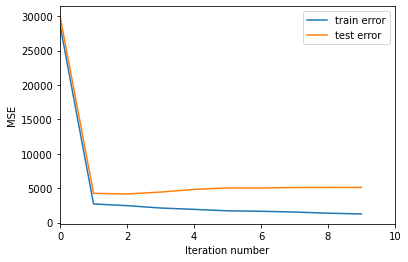

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.16it/s]

Количество деревьев в бустинге 3


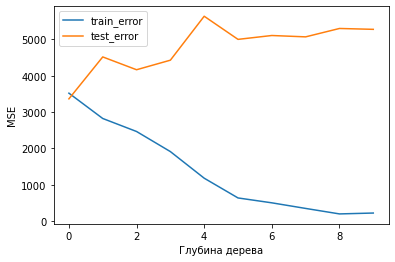

Wall time: 10.9 s


In [2]:
%%time
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)
print(X.shape, y.shape)

temp = GBM(n_trees=10, eta=1, max_tree_depth=3, min_samples_leaf=3, criterion_name='mse')

temp.gb_fit(X=X, Y=y)

temp.evaluate_alg()
temp.get_error_plot()

temp.n_trees = 3
max_depths = range(1, 11)

temp.plot_different_max_depths(max_depths)
    

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:28<00:00,  2.82s/it]

Количество деревьев в бустинге 10


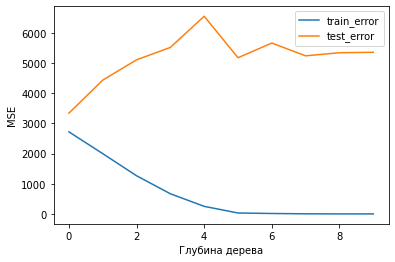

Wall time: 28.3 s


In [3]:
%%time
temp.n_trees = 10
temp.plot_different_max_depths(max_depths)

In [4]:
%%time
temp = GBM(n_trees=50, eta=.3, max_tree_depth=3, min_samples_leaf=3, criterion_name='mse')


_, train_errors_gb, test_errors_gb = temp.gb_fit(X=X, Y=y)

Wall time: 8.67 s


In [5]:
%%time
temp = GBM(n_trees=50, eta=.3, max_tree_depth=3, min_samples_leaf=3, criterion_name='mse')


_, train_errors_sgb, test_errors_sgb = temp.sgb_fit(X=X, Y=y)

Wall time: 4.86 s


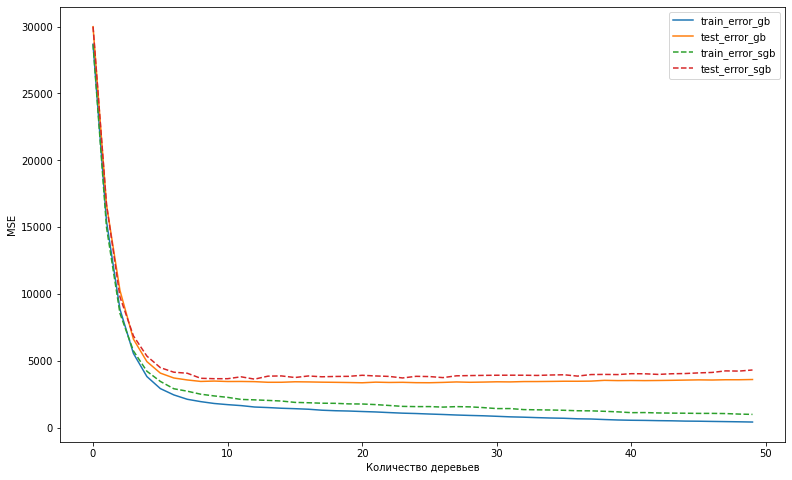

In [6]:
plt.figure(figsize=(13, 8))
plt.plot(range(temp.n_trees), train_errors_gb, label='train_error_gb')
plt.plot(range(temp.n_trees), test_errors_gb, label='test_error_gb')

plt.plot(range(temp.n_trees), train_errors_sgb, label='train_error_sgb', linestyle='--')
plt.plot(range(temp.n_trees), test_errors_sgb, label='test_error_sgb', linestyle='--')
plt.xlabel('Количество деревьев')
plt.ylabel('MSE')
plt.legend();